In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel("2021-2025.xlsx", sheet_name="Sheet1", usecols="A:H")
df = pd.DataFrame(data)

In [2]:
print("Initial Dataset:")
print(data)

Initial Dataset:
           date  CO    NO2     O3   PM10  PM2.5    SO2   count
0    2021-01-01  43  11.00  58.00  29.00  35.00  65.00  65.000
1    2021-01-02  58  11.00  86.00  38.00  64.00  80.00  86.000
2    2021-01-03  64  11.00  93.00  25.00  62.00  86.00  93.000
3    2021-01-04  50  24.00  67.00  24.00  31.00  77.00  77.000
4    2021-01-05  59  23.00  89.00  24.00  35.00  77.00  89.000
...         ...  ..    ...    ...    ...    ...    ...     ...
1212 2025-04-01  24  15.25  23.33  20.65  19.90  21.34   1.979
1213 2025-04-02  15  12.17  14.69  13.23  12.98  13.50   0.545
1214 2025-04-03  20  14.77  20.29  17.45  16.77  19.11   1.512
1215 2025-04-04  16   9.46  15.08  11.27   9.94  13.35   1.808
1216 2025-04-05  32  15.58  23.31  21.27  19.04  22.04   2.256

[1217 rows x 8 columns]


In [3]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1217 non-null   datetime64[ns]
 1   CO      1217 non-null   int64         
 2   NO2     1217 non-null   float64       
 3   O3      1217 non-null   float64       
 4   PM10    1217 non-null   float64       
 5   PM2.5   1217 non-null   float64       
 6   SO2     1217 non-null   float64       
 7   count   1217 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 76.2 KB


,date,CO,NO2,O3,PM10,PM2.5,SO2,count
0,2021-01-01,43,11.00,58.00,29.00,35.00,65.00,65.000
1,2021-01-02,58,11.00,86.00,38.00,64.00,80.00,86.000
2,2021-01-03,64,11.00,93.00,25.00,62.00,86.00,93.000
3,2021-01-04,50,24.00,67.00,24.00,31.00,77.00,77.000
4,2021-01-05,59,23.00,89.00,24.00,35.00,77.00,89.000
...,...,...,...,...,...,...,...,...
1212,2025-04-01,24,15.25,23.33,20.65,19.90,21.34,1.979
1213,2025-04-02,15,12.17,14.69,13.23,12.98,13.50,0.545
1214,2025-04-03,20,14.77,20.29,17.45,16.77,19.11,1.512
1215,2025-04-04,16,9.46,15.08,11.27,9.94,13.35,1.808


In [4]:
data.isnull().sum()

date     0
CO       0
NO2      0
O3       0
PM10     0
PM2.5    0
SO2      0
count    0
dtype: int64

In [5]:
# Labeling 'count' jadi kelas 

def classify_aqi(val):
    if val <= 50:
        return 'Baik'
    elif val <= 100:
        return 'Sedang'
    elif val <= 150:
        return 'Tidak Sehat untuk Kelompok Sensitif'
    elif val <= 200:
        return 'Tidak Sehat'
    elif val <= 300:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

In [6]:
data['label'] = data['count'].apply(classify_aqi)
data

,date,CO,NO2,O3,PM10,PM2.5,SO2,count,label
0,2021-01-01,43,11.00,58.00,29.00,35.00,65.00,65.000,Sedang
1,2021-01-02,58,11.00,86.00,38.00,64.00,80.00,86.000,Sedang
2,2021-01-03,64,11.00,93.00,25.00,62.00,86.00,93.000,Sedang
3,2021-01-04,50,24.00,67.00,24.00,31.00,77.00,77.000,Sedang
4,2021-01-05,59,23.00,89.00,24.00,35.00,77.00,89.000,Sedang
...,...,...,...,...,...,...,...,...,...
1212,2025-04-01,24,15.25,23.33,20.65,19.90,21.34,1.979,Baik
1213,2025-04-02,15,12.17,14.69,13.23,12.98,13.50,0.545,Baik
1214,2025-04-03,20,14.77,20.29,17.45,16.77,19.11,1.512,Baik
1215,2025-04-04,16,9.46,15.08,11.27,9.94,13.35,1.808,Baik


In [7]:
data['label'] = data['count'].apply(classify_aqi)

In [8]:
le = LabelEncoder()
y_encoded = le.fit_transform(data['label'])
label_names = le.classes_ 

In [9]:
X = data[['CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']]
y = data['label']

In [10]:
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Klasifikasi SVM
# ------------------------------
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("\n===== Support Vector Machine (SVM) =====")
print("📌 Accuracy:", accuracy_score(y_test, svm_pred))
print("📌 F1 Score (macro):", f1_score(y_test, svm_pred, average='macro'))
print(classification_report(y_test, svm_pred))


===== Support Vector Machine (SVM) =====
📌 Accuracy: 0.9754098360655737
📌 F1 Score (macro): 0.8579015222118671
                                     precision    recall  f1-score   support

                               Baik       1.00      0.99      0.99        93
                             Sedang       0.97      0.99      0.98        86
                        Tidak Sehat       1.00      0.33      0.50         3
Tidak Sehat untuk Kelompok Sensitif       0.95      0.97      0.96        62

                           accuracy                           0.98       244
                          macro avg       0.98      0.82      0.86       244
                       weighted avg       0.98      0.98      0.97       244



In [13]:
# Klasifikasi XGBoost
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# ------------------------------
xgb_model = XGBClassifier(random_state=42, objective='multi:softmax', num_class=len(le.classes_))
xgb_model.fit(X_train, y_train)
xgb_pred_encoded = xgb_model.predict(X_test)
xgb_pred = le.inverse_transform(xgb_pred_encoded)
y_test_labels = le.inverse_transform(y_test)

print("\n=====  XGBoost =====")
print("📌 Accuracy:", accuracy_score(y_test_labels, xgb_pred))
print("📌 F1 Score (macro):", f1_score(y_test_labels, xgb_pred, average='macro'))
print(classification_report(y_test_labels, xgb_pred))


=====  XGBoost =====
📌 Accuracy: 0.9918032786885246
📌 F1 Score (macro): 0.9445697577276524
                                     precision    recall  f1-score   support

                               Baik       1.00      1.00      1.00        93
                             Sedang       1.00      0.99      0.99        86
                        Tidak Sehat       1.00      0.67      0.80         3
Tidak Sehat untuk Kelompok Sensitif       0.97      1.00      0.98        62

                           accuracy                           0.99       244
                          macro avg       0.99      0.91      0.94       244
                       weighted avg       0.99      0.99      0.99       244



In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_encoded = rf_model.predict(X_test)
rf_pred = le.inverse_transform(rf_pred_encoded)

print("\n===== Random Forest =====")
print("📌 Accuracy:", accuracy_score(y_test_labels, rf_pred))
print("📌 F1 Score (macro):", f1_score(y_test_labels, rf_pred, average='macro'))
print(classification_report(y_test_labels, rf_pred))


===== Random Forest =====
📌 Accuracy: 0.9877049180327869
📌 F1 Score (macro): 0.9417734179362087
                                     precision    recall  f1-score   support

                               Baik       1.00      0.99      0.99        93
                             Sedang       0.99      0.99      0.99        86
                        Tidak Sehat       1.00      0.67      0.80         3
Tidak Sehat untuk Kelompok Sensitif       0.97      1.00      0.98        62

                           accuracy                           0.99       244
                          macro avg       0.99      0.91      0.94       244
                       weighted avg       0.99      0.99      0.99       244



In [15]:
    n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
    max_features = ['auto', 'sqrt']
    max_depth = [int(x) for x in np.linspace(2, 110, num=11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]

    random_grid = {
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap
    }
    print("Random Grid:\n", random_grid)

Random Grid:
 {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 12, 23, 34, 45, 56, 66, 77, 88, 99, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [16]:
#Membuat 3 model
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'XGBoost': XGBClassifier(random_state=42, objective='multi:softmax', num_class=4),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Menyimpan hasil evaluasi
results = []

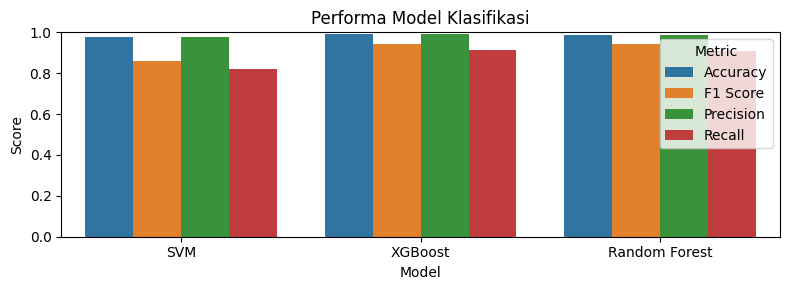

In [17]:
## Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred, average='macro'),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro')
    })

# Konversi ke DataFrame
results_df = pd.DataFrame(results)

# Ubah bentuk ke long format untuk barplot
results_long = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(8, 3))
sns.barplot(data=results_long, x="Model", y="Score", hue="Metric")
plt.title("Performa Model Klasifikasi")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


===== Model: SVM =====

Test Accuracy: 0.9754098360655737
Classification Report:
                                      precision    recall  f1-score   support

                               Baik       1.00      0.99      0.99        93
                             Sedang       0.97      0.99      0.98        86
                        Tidak Sehat       1.00      0.33      0.50         3
Tidak Sehat untuk Kelompok Sensitif       0.95      0.97      0.96        62

                           accuracy                           0.98       244
                          macro avg       0.98      0.82      0.86       244
                       weighted avg       0.98      0.98      0.97       244



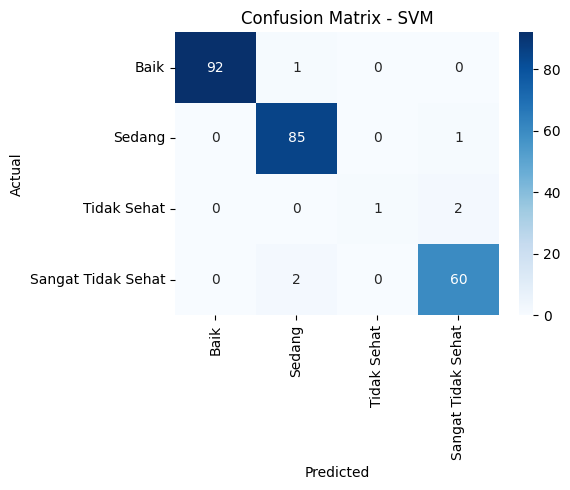


📌 Analisis Kesalahan:
 - Prediksi salah: Aktual = 0, Prediksi = 1
 - Prediksi salah: Aktual = 3, Prediksi = 1
 - Prediksi salah: Aktual = 1, Prediksi = 3
 - Prediksi salah: Aktual = 2, Prediksi = 3
 - Prediksi salah: Aktual = 2, Prediksi = 3
 - Prediksi salah: Aktual = 3, Prediksi = 1

===== Model: XGBoost =====

Test Accuracy: 0.9918032786885246
Classification Report:
                                      precision    recall  f1-score   support

                               Baik       1.00      1.00      1.00        93
                             Sedang       1.00      0.99      0.99        86
                        Tidak Sehat       1.00      0.67      0.80         3
Tidak Sehat untuk Kelompok Sensitif       0.97      1.00      0.98        62

                           accuracy                           0.99       244
                          macro avg       0.99      0.91      0.94       244
                       weighted avg       0.99      0.99      0.99       244



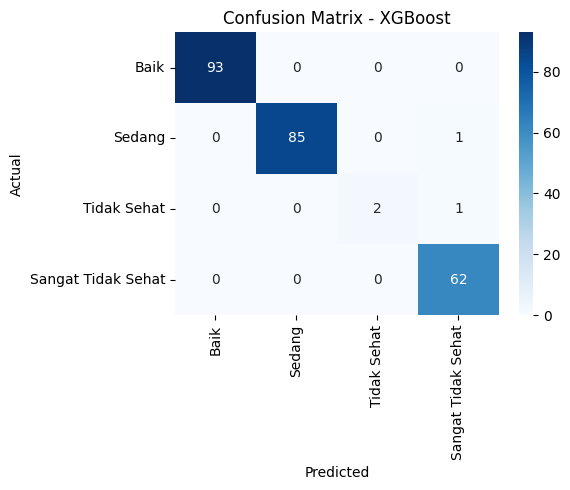


📌 Analisis Kesalahan:
 - Prediksi salah: Aktual = 1, Prediksi = 3
 - Prediksi salah: Aktual = 2, Prediksi = 3

===== Model: Random Forest =====

Test Accuracy: 0.9877049180327869
Classification Report:
                                      precision    recall  f1-score   support

                               Baik       1.00      0.99      0.99        93
                             Sedang       0.99      0.99      0.99        86
                        Tidak Sehat       1.00      0.67      0.80         3
Tidak Sehat untuk Kelompok Sensitif       0.97      1.00      0.98        62

                           accuracy                           0.99       244
                          macro avg       0.99      0.91      0.94       244
                       weighted avg       0.99      0.99      0.99       244



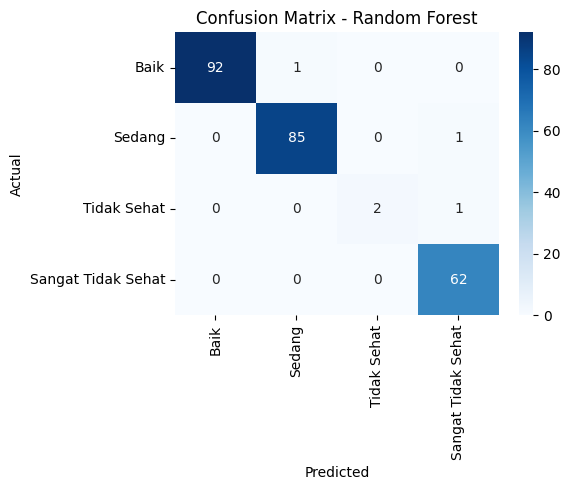


📌 Analisis Kesalahan:
 - Prediksi salah: Aktual = 0, Prediksi = 1
 - Prediksi salah: Aktual = 1, Prediksi = 3
 - Prediksi salah: Aktual = 2, Prediksi = 3


In [23]:
# 2. K-Fold Cross Validation dan Analisis Kesalahan Klasifikasi
# --------------------------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n===== Model: {name} =====")
    
    # Fit model ke data latih
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_label = [label_names[i] for i in y_pred]  # ubah integer ke string label
    y_test_label = [label_names[i] for i in y_test]
    labels = ["Baik", "Sedang", "Tidak Sehat", "Sangat Tidak Sehat"]

    # Evaluasi akurasi dan metrik lainnya
    print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test_labels, y_pred_label, target_names=label_names))

    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Analisis kesalahan klasifikasi
    print("\n📌 Analisis Kesalahan:")
    for true_class, pred_class in zip(y_test, y_pred):
        if true_class != pred_class:
            print(f" - Prediksi salah: Aktual = {true_class}, Prediksi = {pred_class}")

In [ ]:
# 10. Menentukan best model (berdasarkan Akurasi)
best_model_row = results_df.loc[results_df['Accuracy'].idxmax()]
print("\n✅ Best Model Based on Accuracy:")
print(best_model_row)

In [ ]:
import streamlit as st
import numpy as np
import pickle
import os

In [ ]:
with open("model_udara.pkl", "wb") as f:
    pickle.dump((model, scaler), f)

In [ ]:
st.set_page_config(page_title="Klasifikasi Udara Bekasi", layout="wide")
st.title("🌫️ Klasifikasi Kualitas Udara di Bekasi (2021 - 2025)")
st.markdown("Masukkan parameter kualitas udara untuk klasifikasi:")

# Input tanggal
tanggal_input = st.date_input("📅 Tanggal Pengamatan")

# Input parameter kualitas udara
pm25 = st.number_input("PM2.5", min_value=0.0, format="%.2f")
pm10 = st.number_input("PM10", min_value=0.0, format="%.2f")
co = st.number_input("CO", min_value=0.0, format="%.2f")
so2 = st.number_input("SO2", min_value=0.0, format="%.2f")
no2 = st.number_input("NO2", min_value=0.0, format="%.2f")
o3 = st.number_input("O3", min_value=0.0, format="%.2f")

model_path = "model_udara.pkl"
data_path = "2021-2025.xlsx"

In [ ]:
# Load model
if not os.path.exists(model_path):
    st.error("❌ File model_udara.pkl tidak ditemukan! Jalankan train_model.py terlebih dahulu.")
else:
    with open(model_path, "rb") as f:
        model, scaler = pickle.load(f)

    if st.button("🔍 Klasifikasi Kualitas Udara"):
        fitur = np.array([[pm25, pm10, co, so2, no2, o3]])
        fitur_scaled = scaler.transform(fitur)
        prediksi = model.predict(fitur_scaled)

        label_mapping = {
            "Rendah": "✅ Udara dalam kondisi baik",
            "Berbahaya": "☠️ Udara sangat berbahaya",
            "Sakit Berbahaya": "🚨 Udara berpotensi menyebabkan gangguan kesehatan"
        }
        hasil_label = prediksi[0]
        interpretasi = label_mapping.get(hasil_label, "Tidak diketahui")

        st.success(f"📅 Tanggal: **{tanggal_input}**")
        st.info(f"🧾 Hasil Klasifikasi: **{hasil_label}**")
        st.write(f"📌 Interpretasi: {interpretasi}")

In [ ]:
# Visualisasi data historis
if os.path.exists(data_path):
    st.markdown("---")
    st.subheader("📊 Data Historis Kualitas Udara Bekasi (2021 - 2025)")
    df = pd.read_excel(data_path, sheet_name="Sheet1", usecols="A:H")

    df.columns = [col.strip().lower() for col in df.columns]

    st.write(df.head())

    st.markdown("### Statistik Deskriptif")
    st.dataframe(df.describe())

    st.markdown("### Distribusi PM2.5 dan PM10")
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.histplot(df["pm2.5"], color="blue", label="PM2.5", kde=True, ax=ax)
    sns.histplot(df["pm10"], color="red", label="PM10", kde=True, ax=ax)
    ax.legend()
    ax.set_title("Distribusi PM2.5 dan PM10")

    st.pyplot(fig)

    st.markdown("### Tren Bulanan PM2.5 dan PM10")
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)
        monthly_avg = df[["pm2.5", "pm10"]].resample("M").mean()

        fig2, ax2 = plt.subplots(figsize=(12, 5))
        monthly_avg.plot(ax=ax2)
        ax2.set_ylabel("Konsentrasi (µg/m³)")
        ax2.set_title("Rata-rata Bulanan PM2.5 dan PM10")
        st.pyplot(fig2)
    elif "tanggal" in df.columns:
        df["tanggal"] = pd.to_datetime(df["tanggal"])
        df.set_index("tanggal", inplace=True)
        monthly_avg = df[["pm2.5", "pm10"]].resample("M").mean()

        fig2, ax2 = plt.subplots(figsize=(12, 5))
        monthly_avg.plot(ax=ax2)
        ax2.set_ylabel("Konsentrasi (µg/m³)")
        ax2.set_title("Rata-rata Bulanan PM2.5 dan PM10")
        st.pyplot(fig2)
    else:
        st.warning("Kolom tanggal tidak ditemukan untuk visualisasi tren bulanan.")
else:
    st.warning("📁 File data '2021-2025.xlsx' tidak ditemukan.")